# 4.9 Intro to Data Visualizations with Python
# Part 2

1. Import libraries (direction 1)

2. Import data (direction 1)

3. Histogram (direction 3)

4. Bar chart (direction 4)

5. Line chart (direction 5 and 6)

6. Scatterplot (direction 7)

7. Export visualizations (direction 8)

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import data

In [2]:
# Create a path

path = r'/Users/marie/Documents/CareerFoundry/09-2021 Instacart Basket Analysis'

In [3]:
ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_current.pkl'))

In [4]:
# Check the imported data

ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,loyalty_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 3. Histogram

**Direction 3.** You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

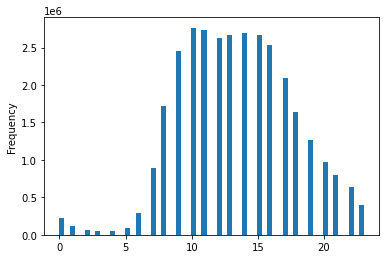

In [5]:
# Create a histogram of the "order_hour_of_day" column

hist = ords_prods['order_hour_of_day'].plot.hist(bins = 60)

**Answer: The busiest hours of day is between ~9-17, when the most orders are placed.**

# 4. Bar chart

**Direction 4.** The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

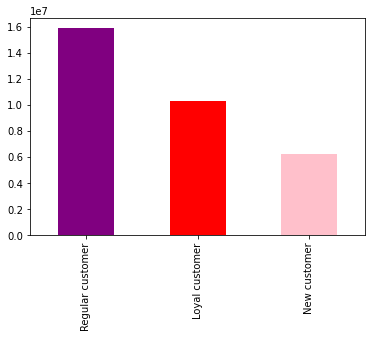

In [6]:
# Create a bar chart from the "loyalty_flag column"

bar = ords_prods['loyalty_flag'].value_counts().plot.bar(color =['purple', 'red', 'pink'])

**Answer: The Bar chart from the loyalty flag shows that Regular customer is around 1,6, Loyal around 1,0 and New customers around 0,6 millions.**

# 5. Line chart

**Direction 5.** Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [7]:
# Create a sample with random numbers

np.random.seed(4)
dev = np.random.rand(len(ords_prods)) <= 0.7

In [8]:
# Check the output

dev

array([False,  True, False, ...,  True,  True,  True])

In [9]:
# Split the dataframe into two samples

big = ords_prods[dev]
small = ords_prods[~dev]

In [10]:
# Check the result and see if the rows in the two samples are the same as in the original dataframe.

len(ords_prods)

32435059

In [11]:
len(big) + len(small)

32435059

In [12]:
# Create a new dataframe that contains only the "prices" and "order_hour_of_day" for the small subset

df = small[['order_hour_of_day','prices']]

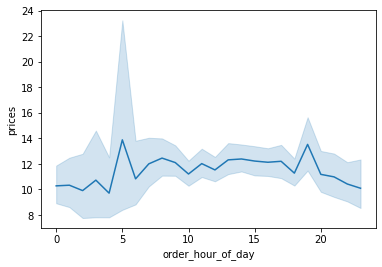

In [13]:
# Create a line chart with the small sample data -df

line = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

**Answer: There seams to be a peak regarding prices around 5 in the morning. Could it be that customers are ordering something urgently and then the price doesn´t matter(?). There is also a peak around 19 in the evening, this is probably caused by unplanned dinners.**

**Direction 6.**
Now that you have information about customers, you need to conduct some exploratory analysis of customer 
demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between 
age and family status by creating a line chart exploring the connections between age and number of dependents.

In [14]:
# Create a new dataframe that contains only the "age" and "n_dependants" for the small subset

df_2 = small[['age','n_dependants']]

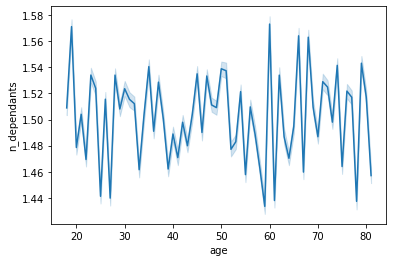

In [15]:
line_2 = sns.lineplot(data = df_2, x = 'age',y = 'n_dependants')

**Answer: There not seams to be some special connections between number of dependants and age. It goes up and down. A little bit more number of dependants for the older customers (except for 19-20 years old).**

# 6. Scatterplot

**Direction 7.** You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

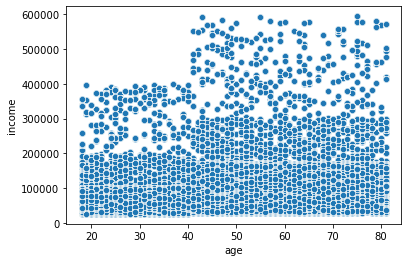

In [16]:
# Create a Scatterplot

scatter = sns.scatterplot(x = 'age', y = 'income',data = ords_prods)

**Answer: There are more spending power above the age of 40**

# 7. Export visualizations 

**Direction 8.** Export your visualizations as “.png” files in your relevant project folder.

In [17]:
# Export bar visualizations as an image file

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [18]:
# Export histogram visualizations as an image file

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hourofday.png'))

In [19]:
# Export line visualizations as an image file

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hourofday.png'))

In [20]:
# Export line_2 visualizations as an image file

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [ ]:
# Export line visualizations as an image file

scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))